# Lecture 2
# Building blocks of Neural Networks

**Notes on January 27 2022**

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Size of training images
print(train_images.shape)

# Size of training labels
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
# Size of training images
print(test_images.shape)

# Size of training labels
print(test_labels.shape)

(10000, 28, 28)
(10000,)


## Build first model

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(512,activation="relu"),layers.Dense(10,activation="softmax")])

Metal device set to: Apple M1


2022-02-01 09:21:02.038044: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-01 09:21:02.038204: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model compilation step (Three minimum necessary things)
* Optimizer - Mechanism through which the model will update itself based on the training data
* Loss function - measures performance as feedback to optimizer
* Metrics - Monitor performace during training and testing
    * Classification accuracy = fraction of images correctly classified

In [7]:
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

Prepare Image Data
Inparticular, reshape the data into a common form
* Shape: number of training samples x dim
* Values: floating points between [0,1]

In [8]:
train_images = train_images.reshape((60000, 28 * 28)) #Flatting 2 dim image data to vector
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

"Fitting the Model"
* Training images
* Training labes
* \# of epochs
* batch_size (Partition of Training set)

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

2022-02-01 09:21:13.809936: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-02-01 09:21:14.220322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 5ms/step - loss: 0.2516 - accuracy: 0.9275
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1028 - accuracy: 0.9702
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0675 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0498 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0375 - accuracy: 0.9886


Test on the first 10 images of the testing set

In [10]:
test_digits = test_images[0:10] # Select first 10 images
predictions = model.predict(test_digits) # Make prediction

2022-02-01 09:21:33.241174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [11]:
# See prediction of first 
print(predictions[0]) #See predicited probability of image being in one class
print(predictions[0].argmax())
print(predictions[0][7]) #Probability of sample coming from the class 7

[6.26227115e-09 7.26554983e-10 4.02140358e-06 3.60172766e-04
 2.36978822e-11 5.71585801e-08 1.90400687e-13 9.99630451e-01
 1.00732535e-07 5.14277144e-06]
7
0.99963045


In [30]:
print(test_labels[0]) #Ground truth value matches prediction 

7


Evaluate the model on the test set

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

 31/313 [=>............................] - ETA: 0s - loss: 0.0683 - accuracy: 0.9758

2022-02-01 09:21:43.408924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9788
test_acc: 0.9788000583648682


Observe the testing accuracy (0.9798) is less than that of the training accuracy (0.9886) and the tresting  and loss (0.0659) is greater than the training loss (0.0377) as expected. _(Values recorded on Jan 27 2022)_ 

## Numpy Primer

In [33]:
import numpy as np

Tensor is a d dimensional array
* Rank = # of dimensions = # of axes 
* d = 0,1,2,3...

In [37]:
# Scalar is rank 0
x = np.array(12)
print(x.ndim)

0


In [38]:
# Vector is rank 1
x = np.array([12, 3, 6, 14, 7])
print(x.ndim)

1


In [40]:
# Matrix is rank 2
x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],])
print(x.ndim)

2


## Display the 4th digit

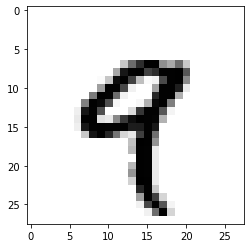

9

In [5]:
import matplotlib.pyplot as plt
digit = train_images[4] 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()
train_labels[4]

## Manipulating Tensors

In [9]:
my_slice = train_images[10:100]
print(my_slice.shape)
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)


In [10]:
my_slice = train_images[10:100, 0:28, 0:28] 
my_slice.shape

(90, 28, 28)

In [11]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [12]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

**Notes on February 1 2022**

## Element-wise operations

Naive relu \& addition

In [9]:
def naive_relu(x):
    assert len(x.shape) == 2 # x is a rank-2 matrix
    x = x.copy() # avoid overwriting the input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

In [10]:
def naive_add(x,y):
    assert len(x.shape)==2
    assert x.shape == y.shape # both x and y are both rank 2 
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

Very slow! Scales with both x and y.
* Massivly parallel implementaitons possible
    * Basic Linear algebra Subprograms (BLAS) implementaiton for NumPy

In [12]:
import time
import numpy as np
x = np.random.random((20, 100))
y = np.random.random((20, 100))
t0 = time.time()

for _ in range(1000): # "_" is a dummy receptical saves memory
    z=x+y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s
Took: 1.17 s


## Broadcasting 

How do we add two tensors of different shapes?

Broadcasting consits of two steps:
* Axes (called broadcast axes) are added to the smaller dimension ot match the ndim of the larger tensor
* The tensor is rpeaded along these new axes to match the full shape of the larger tensor

In [16]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))
y = np.expand_dims(y, axis=0)
Y = np.concatenate([y] * 32, axis=0)

In [21]:
def naive_add_matrix_and_vector(x, y): 
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+= y[j]
    return x

## Tensor Product
Non-element wise operation

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

Matrix vector dot product. Two methods

In [24]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

## Tensor Reshaping

In [27]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
print(x.shape)
x = x.reshape((6, 1))
print(x)
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(3, 2)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
(20, 300)


## Practice 2-1

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

1. Perform element-wise multiplication of the first two
images and plot it using plt.imshow()

In [4]:
product_elemnt_wise= np.multiply(train_images[0],train_images[1])


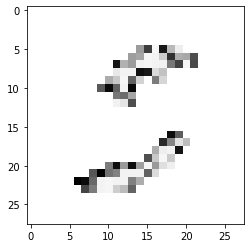

In [5]:
import matplotlib.pyplot as plt
plt.imshow(product_elemnt_wise, cmap=plt.cm.binary) 
plt.show()

2. Perform tensor multiplication of the first two images
and plot it.

In [6]:
product_tensor = np.dot(train_images[0],train_images[1])

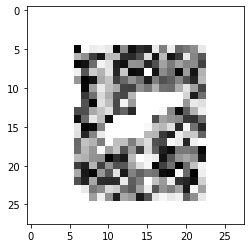

In [42]:
plt.imshow(product_tensor, cmap=plt.cm.binary) 
plt.show()

3.
Randomly generate 10 numbers $\alpha_1, ... , \alpha_{10}$ from the
uniform distribution.
Plot the weighted sum $\alpha_1 x_1 + ... + \alpha_{10} x_{10}$. 

In [13]:
indices = np.array(np.where(train_labels==0))[0,:10]

In [14]:
data = np.random.uniform(0,1,10)
prob_dist = np.random.uniform(0,1,10)/ sum(data)

In [15]:
image = np.zeros((28,28))
for idx, val in enumerate(indices):
    image+= prob_dist[idx]*train_images[val]

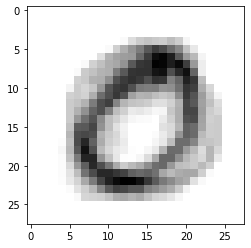

In [16]:
plt.imshow(image, cmap=plt.cm.binary) 
plt.show()

**Notes on Februrary 3 2022**

## Gradient descent and backprop

What is a training loop?
1. Draw of batch of traning samples `x` and corresponding targets, `y_true`. We do this because of memeory constraints. 
2. Run the model on `x` (called the *forward pass*) to obtain a prediction `y_pred`.
3. Compute the loss of the model on the batch, a measure of the \"error\" between `y_pred` and `y_true`.
4. Update all weights of the model in a way that slightly reduces the loss of this batch. 

The *gradient* at a point $x:=[x_1,...,x_D]^\top \in \mathbb{R}^D$ for a function $f$ is defined as
$$\nabla_x f:= [\frac{df}{dx_1},...,\frac{df}{dx_1}]^\top$$

Gradient descent (GD), *try* and minimize the *loss* by repeating
$$ w \leftarrow w - \eta \nabla_W loss$$

Different versions:
   * Gradient desent, batch size uses all training data
   * Stochastic Gradient descent, batch size 1
   * (mini)batch GD, batch size smaller than all training data (SGD is (mini)batch GD)
   * Adaptive methods
        * Adagrad, RMSprop

Gradient Descent with Momentum

```
past_velocity = 0.
momentum = 0.1
while loss > 0.01:
w, loss, gradient = get_current_parameters()
velocity = past_velocity * momentum - learning_rate * gradient 
w = w + momentum * velocity - learning_rate * gradient  
past_velocity = velocity
update_parameter(w)
```

Given the forward computation graph,the backward computation graph can be generated automatically

## The gradient tape in TensoFlow
Gradient tape
* Python scope to infove TensorFlow's automatic differentiation

In [ ]:
import tensorflow as tf
## Example 1
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y=2*x+3
grad_of_y_wrt_x = tape.gradient(y, x)

In [2]:
## Example 2
x = tf.Variable(tf.random.uniform((2, 2))) 
with tf.GradientTape() as tape:
    y=2*x+3
grad_of_y_wrt_x = tape.gradient(y, x)

Metal device set to: Apple M1


2022-02-03 12:07:42.791017: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-03 12:07:42.791394: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [18]:
## Example 3
W = tf.Variable(tf.random.uniform((2, 2))) 
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b 
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [19]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.91361475, 0.91361475],
        [0.69635034, 0.69635034]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Practice 2-2

In [17]:
#Practice 2-2
W = tf.Variable(3.) 
b = tf.Variable(1.)
x = tf.Variable(2.)
with tf.GradientTape() as tape:
    y = x*W + b 
    loss_val = abs(y-4.)
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [23]:
#Gradient with respect to W
print(grad_of_y_wrt_W_and_b[0])
#Gradient with respect to b
print(grad_of_y_wrt_W_and_b[1])

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


**Notes on February 8 2022**

In [16]:
import tensorflow as tf
x0 = tf.Variable(3.0, name='x0') # A trainable variable
x1 = tf.Variable(3.0, name='x1', trainable=False) # Not trainable # Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name='x2') + 1.0 # Adding a constant makes it a constant tensor
x3 = tf.constant(3.0, name='x3') # Not a variable
with tf.GradientTape() as tape: 
    y = (x0**2) + (x1**2) + (x2**2)
grad = tape.gradient(y, [x0, x1, x2, x3])
for g in grad:
  print(g)

tf.Tensor(5.9999995, shape=(), dtype=float32)
None
None
None


Recall the first simple model using tensor flow

In [ ]:
from tensorflow.keras.datasets import mnist
## Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(
)
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype("float32") / 255
## Model
model = keras.Sequential([ layers.Dense(512, activation="relu"), layers.Dense(10, activation="softmax") ])
## Compilation
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
## Training
model.fit(train_images, train_labels, epochs=5, batch_size=128)

## Simple Model From Scratch

**A simple dense class**
* `output = activation(dot(W,input)+b)`

In [21]:
import tensorflow as tf
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1) 
        self.W = tf.Variable(w_initial_value)
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)
    
    @property
    def weights(self):
        return [self.W, self.b]

* A simple sequential class to chain the layers

In [24]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x
    
    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

Using this `NaiveDense` class and this `NaiveSequential` class, we can create a mock Keras model

In [27]:
model = NaiveSequential([
NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax) ])
assert len(model.weights) == 4

In [31]:
import math
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)
    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [34]:
def one_training_step(model, images_batch, labels_batch): 
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
        
    gradients = tape.gradient(average_loss, model.weights) 
    update_weights(gradients, model.weights)
    return average_loss

In [35]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights): 
    optimizer.apply_gradients(zip(gradients, weights))